In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os, sys
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import spearmanr
import matplotlib.dates as mdates
from datetime import datetime, timedelta

sys.path.append('../utils/')

from utils import *
from analysis_utils import *

plt.rcParams['font.family'] = 'Helvetica'

In [29]:
prefix = '../data/prepared/merged/'
units = 'months'

In [30]:
normalized_controls = pd.read_csv(prefix + 'merged_controls_' + units + '.csv')

In [31]:
normalized_controls

,ds,Time,Month,taylor_swift,taylor_swift_lyrics,taylor_swift_album,taylor_swift_songs,taylor_swift_tour,speak_now,ts_1989,...,drake_album,drake_songs,drake_tour,views,scorpion,nwts,tml,take_care,all_ts_albums,all_drake_albums
0,2003-12-31,0,1,0.0,0.00,0.00,0.00,0.00,0.000000,0.285714,...,0.000000,0.000000,0.000000,0.0,0.000,0.0,0.0,0.0,0.285714,0.000
1,2004-01-31,1,2,0.0,0.00,0.00,0.00,0.00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000,0.0,0.0,0.0,0.000000,0.000
2,2004-02-29,2,3,0.0,0.00,0.00,0.00,0.00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000,0.0,0.0,0.0,0.450000,0.000
3,2004-03-31,3,4,0.0,0.00,0.00,0.00,0.00,0.000000,0.571429,...,0.000000,0.000000,0.000000,0.0,0.000,0.0,0.0,0.0,0.571429,0.000
4,2004-04-30,4,5,0.0,0.00,0.00,0.00,0.00,0.000000,0.571429,...,0.000000,0.000000,0.000000,0.0,0.000,0.0,0.0,0.0,0.571429,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,2023-12-31,240,1,65.0,2.07,0.85,2.04,2.66,1.384615,3.714286,...,0.261711,0.385855,0.328816,0.0,0.000,0.0,0.0,0.0,12.501589,0.000
241,2024-01-31,241,2,100.0,2.70,4.05,2.94,3.85,2.076923,4.285714,...,0.261711,0.436184,0.751579,0.0,0.000,0.0,0.0,0.0,15.816808,0.000
242,2024-02-29,242,3,43.0,1.98,1.15,2.13,3.01,2.076923,3.714286,...,0.261711,0.385855,0.469737,0.6,0.000,0.0,0.0,0.0,13.359883,0.600
243,2024-03-31,243,4,59.0,6.66,5.00,2.88,1.75,2.076923,3.714286,...,0.327138,0.452961,0.187895,0.6,0.225,0.0,0.0,0.0,13.516695,0.825


In [32]:
def plot_fig_subplots(merged, title=None, month_interval=3, col_map=None, date_col='ds',alpha=0.5):

    
    time_name = 'T'
    merged[time_name] = pd.to_datetime(merged[date_col], infer_datetime_format=True, errors='coerce')
    
    # Create a figure and a grid of subplots
    fig, axs = plt.subplots(2, 1, sharex=False, sharey=False)
    
    #fig.delaxes(axs[4,1])
    
    # Flatten the array of axes for easy iteration
    axs = axs.flatten()
    
    # Plot 1: Drake
    for key in drake_col_map:
        if key == 'drake':
            axs[0].plot(merged[time_name], merged[key], label=drake_col_map[key], color='black', alpha=alpha)
        else:
            axs[0].plot(merged[time_name], merged[key], label=drake_col_map[key], alpha=alpha)
    #axs[0].set_xlabel('Date')
    axs[0].set_ylabel('Search volume')
    axs[0].set_title("Drake albums")
    axs[0].legend()
    axs[0].tick_params(axis='x', rotation=45)
    
    # Plot 2: Taylor Swift
    for key in ts_col_map:
        if key == 'taylor_swift':
            axs[1].plot(merged[time_name], merged[key], label=ts_col_map[key], color='black', alpha=alpha)    #axs[0].set_xlabel('Date')
        else:
            axs[1].plot(merged[time_name], merged[key], label=ts_col_map[key], alpha=alpha)    #axs[0].set_xlabel('Date')
    axs[1].set_ylabel('Search volume')
    axs[1].set_title("Taylor Swift albums")
    axs[1].tick_params(axis='x', rotation=45)
    

    axs[1].legend()

    #print(handles)
    #print(labels)
    
    # Adjust layout to make room for the legend
    fig.tight_layout() #
    #plt.subplots_adjust(hspace=0.5, bottom=0.2)

    plt.show()

In [33]:
def plot_fig_subplots_twinax(merged, title=None, month_interval=3, col_map=None, date_col='ds',alpha=0.5):
    time_name = 'T'
    merged[time_name] = pd.to_datetime(merged[date_col], infer_datetime_format=True, errors='coerce')
    
    # Create a figure and a grid of subplots
    fig, axs = plt.subplots(2, 1, sharex=False, sharey=False)
    
    #fig.delaxes(axs[4,1])
    
    # Flatten the array of axes for easy iteration
    axs = axs.flatten()
    
    # Plot 1: 'drake'
    axs[0].plot(merged[time_name], merged['drake'], label=drake_col_map['drake'], color='black', alpha=alpha)
    #axs[0].set_xlabel('Date')
    axs[0].set_ylabel('Search volume')
    axs[0].set_title("Drake albums")
    #axs[0].legend()
    axs[0].tick_params(axis='x', rotation=45)
    
    # Plotting the documentaries
    twinax_drake = axs[0].twinx()
    for key in drake_col_map:
        if key == 'drake':
            continue
        twinax_drake.plot(merged[time_name], merged[key], label=drake_col_map['drake'],alpha=alpha)
    twinax_drake.set_xlabel('Date')
    #twinax.set_ylabel('Search volume: Topics')
    #ax.set_title('Title')
    #twinax.tick_params(axis='x', rotation=45)
    twinax_drake.tick_params(axis='y')
    
    handles = []
    labels = []
    
    this_handles, this_labels = axs[0].get_legend_handles_labels()
    handles += this_handles
    labels += this_labels

    this_handles, this_labels = axs[0].get_legend_handles_labels()
    handles += this_handles
    labels += this_labels        
        
    to_put_in_legend = ['Forks Over Knives', 'Cowspiracy', 'What the Health', 'Okja', 'The Game Changers']
                        #, "`Plant based'", "`Vegan'",  "`Vegetarian'", 'Beef demand', 'Chicken demand', 'Pork demand']
        
    indices = []
    for lab in to_put_in_legend:
        indices.append(labels.index(lab))
        
    handles_to_plot = [handles[i] for i in indices]
    labels_to_plot = [labels[i] for i in indices]
        
    fig.legend(handles_to_plot, labels_to_plot, loc='lower center', ncol=3, borderaxespad=0.1)

    
    
    # Plot 2: Taylor Swift
    axs[1].plot(merged[time_name], merged['taylor_swift'], label=ts_col_map['taylor_swift'], color='black', alpha=alpha)    #axs[0].set_xlabel('Date')
    axs[1].set_ylabel('Search volume')
    axs[1].set_title("Taylor Swift albums")
    axs[1].tick_params(axis='x', rotation=45)
    #axs[1].legend()

    #print(handles)
    #print(labels)
    
    # Adjust layout to make room for the legend
    fig.tight_layout() #
    #plt.subplots_adjust(hspace=0.5, bottom=0.2)

    plt.show()    


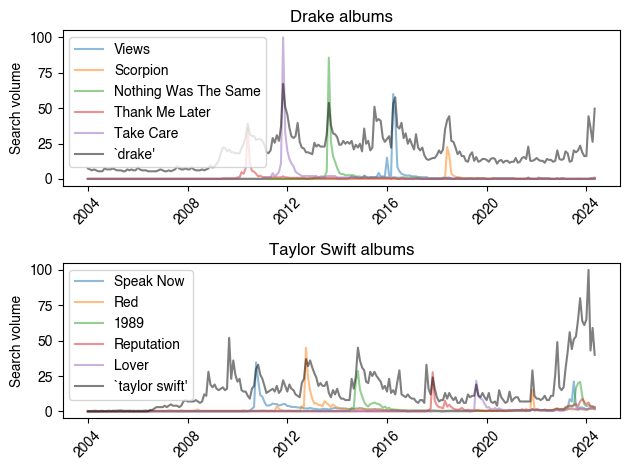

In [34]:
"""
Follow the format of .
Left axis: terms.
Right axis: Topics.
"""

ts_col_map = {'speak_now': 'Speak Now', 'red': 'Red', 'ts_1989': '1989', 'reputation': 'Reputation', 
       'lover': 'Lover', 'taylor_swift': "`taylor swift'"}
drake_col_map = {'views': 'Views', 'scorpion': 'Scorpion', 'nwts': 'Nothing Was The Same', 'tml': 'Thank Me Later', 
       'take_care': 'Take Care', 'drake': "`drake'"}
plot_fig_subplots(normalized_controls)

In [35]:
#plot_fig_subplots_twinax(normalized_controls)

In [36]:
normalized_controls['drake'].max()

67.10526315789474